In [1]:
#@title Copyright 2023 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Colabs

Machine Learning Crash Course uses Colaboratories (Colabs) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). For more information about Colabs and how to use them, go to [Welcome to Colaboratory](https://research.google.com/colaboratory).

# Linear Regression
In this Colab you will use a real dataset to train a model to predict the housing price.

## Learning Objectives
After completing this Colab, you'll be able to:

  * Read a .csv file into a [pandas](https://developers.google.com/machine-learning/glossary/#pandas) DataFrame.
  * Explore a [dataset](https://developers.google.com/machine-learning/glossary/#data_set) with Python visualization libraries.
  * Experiment with different [features](https://developers.google.com/machine-learning/glossary/#feature) to build a linear regression model.
  * Tune the model's [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter).
  * Compare training runs using [root mean squared error](https://developers.google.com/machine-learning/glossary/#root-mean-squared-error-rmse) and [loss curves](https://developers.google.com/machine-learning/glossary/#loss-curve).

## The Dataset
  
The [dataset for this exercise](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) is based on 1990 census data from California. The dataset is old but still provides a great opportunity to learn about machine learning programming.

# Part 1 - Setup Exercise


---



## Load required modules

This exercise depends on several Python libraries to help with data manipulation, machine learning tasks, and data visualization.

**Instructions**
1. Run the **Load dependencies** code cell (below).

In [2]:
#@title Code - Load dependencies

#general
import io

# data
import numpy as np
import pandas as pd

# machine learning
import keras

# data visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt


# **The dataset**
Datasets are often stored on disk or at a URL in .csv format.

A well-formed .csv file contains column names in the first row, followed by many rows of data. A comma divides each value in each row. For example, here are the first five rows of the .csv file holding the California Housing Dataset:

"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000

### Load the .csv file into a pandas DataFrame

This Colab, like many machine learning programs, gathers the .csv file and stores the data in memory as a pandas Dataframe.  Pandas is an open source Python library.  The primary datatype in pandas is a DataFrame.  You can imagine a pandas DataFrame as a spreadsheet in which each row is identified by a number and each column by a name. Pandas is itself built on another open source Python library called NumPy. If you aren't familiar with these technologies, please view these two quick tutorials:

*   [NumPy](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/numpy_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=numpy_tf2-colab&hl=en)
*   [Pandas DataFrames](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en)

# **Your Task:**

T1. Import the .csv file into a pandas DataFrame and scale the values in the label (`median_house_value`):

In [3]:
# Import the dataset.

sheet_url = "https://docs.google.com/spreadsheets/d/1EO-m-3jfrIpNm9-jksYIEp2__WgQwrn3GwBOCpj__h4/export?format=csv"
housing_dataset = pd.read_csv(sheet_url)
training_df = housing_dataset[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]]
print(housing_dataset.head())
# Scale the label.
scale_factor = 10000
training_df['median_house_value'] /= scale_factor


# Print the first rows of the pandas DataFrame.
print(training_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -120.23     39.56                  14         1781             346   
1    -120.24     39.67                  52          296              63   
2    -120.24     39.67                  40          690             129   
3    -120.48     39.66                  32         1516             289   
4    -121.06     38.51                   6         6873             959   

   population  households  median_income  median_house_value      County  
0         734         287         2.4600               93000      Sierra  
1         143          56         3.6250               68600      Sierra  
2         305         110         2.3625               62500      Sierra  
3         304         131         1.8839               71000      Sierra  
4        2354         931         6.8869              263100  Sacramento  
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -120.23     39.56  

<ipython-input-3-02c9d0da8713>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['median_house_value'] /= scale_factor


# Part 2 - Dataset Exploration


---



# **Your Task : View dataset statistics**

A large part of most machine learning projects is getting to know your data. In this step, you will use the appropriate method to view descriptive statistics about the dataset and answer some important questions about the data.

**Instructions**
1. Inspect the output and answer these questions:
  * What is the maximum no. of bedrooms?
  * What is the mean income?
  * What is teh maximum "median house value"?
  * Are any features missing data?

In [4]:
#@title Code - View dataset statistics
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')
#What is the maximum no. of bedrooms?
print('Maximum number of bedrooms: {}'.format(training_df['total_bedrooms'].max()))
#What is the mean income?
mean_income = sum(training_df['median_income']) / len(training_df.index)
print(f"Mean income: {mean_income}")
#What is the maximum "median house value"?
print('Maximum median house value :{}'.format(training_df['median_house_value'].max()))
#Check missing data
print("Check missing data :\n{}".format(training_df.isnull().sum()))


Total number of rows: 17000


Maximum number of bedrooms: 6445
Mean income: 3.883578100000033
Maximum median house value :50.0001
Check missing data :
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


## Your Task:  Generate a correlation matrix

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label).

 use a **correlation matrix** to identify features whose values correlate well with the label. Correlation values have the following meanings:

  * **`1.0`**: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
  * **`-1.0`**: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
  * **`0.0`**: no correlation; the two columns [are not linearly related](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

In general, the higher the absolute value of a correlation value, the greater its predictive power.

**Instructions**

Answer these questions:
  * Which feature correlates most strongly to the label house price?
  * Which feature correlates least strongly to the label house price?


In [5]:
#@title Code - View correlation matrix
training_df.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [6]:
# Which feature correlates most strongly to the label house price?
# ---------------------------------------------------------
answer = '''
The feature with the strongest correlation to the house price is median_income.
As high median_income in specific  area will lead to high median_house_value
'''
print(answer)


# Which feature correlates least strongly to the label house price?
# -----------------------------------------------------------
answer = '''The feature with the weakest correlation to the house price is population.'''
print(answer)


The feature with the strongest correlation to the house price is median_income.
As high median_income in specific  area will lead to high median_house_value

The feature with the weakest correlation to the house price is population.


## Your Task: Visualize relationships in dataset

Use a **pair plot** to generate a grid of pairwise plots to visualize the relationship of each feature with all other features all in one place.

Explain your understanding from the pair plot


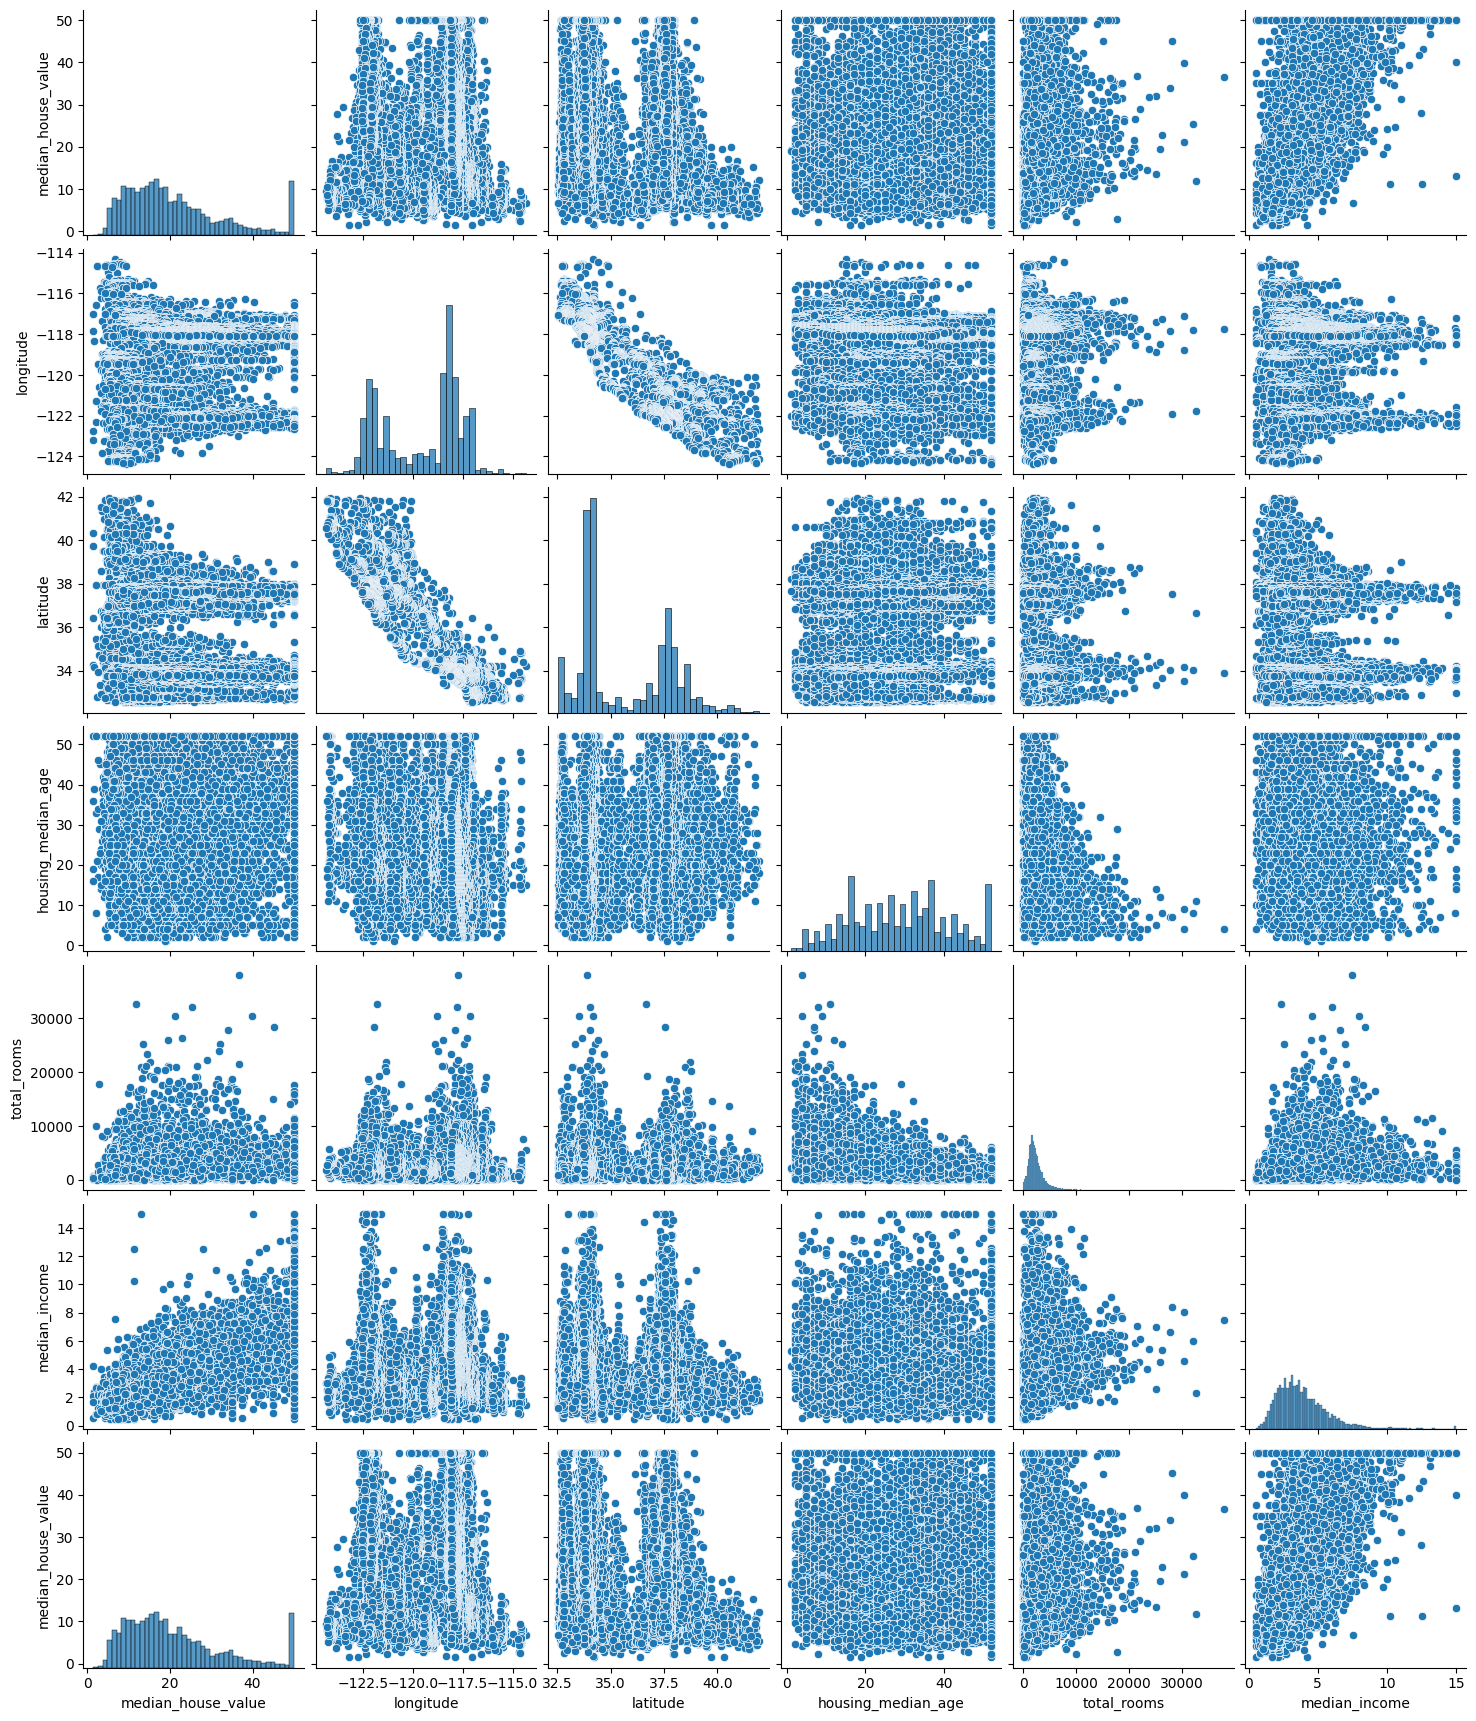

In [7]:
#@title Code - View pairplot
sns.pairplot(training_df, x_vars=["median_house_value", "longitude", "latitude","housing_median_age", "total_rooms", "median_income" ], y_vars=["median_house_value", "longitude","latitude","housing_median_age", "total_rooms", "median_income", "median_house_value"])

# Part 3 - Train Model


---



In [8]:
#@title Define plotting functions

def make_plots(df, feature_names, label_name, model_output, sample_size=200):

  random_sample = df.sample(n=sample_size).copy()
  random_sample.reset_index()
  weights, bias, epochs, rmse = model_output

  is_2d_plot = len(feature_names) == 1
  model_plot_type = "scatter" if is_2d_plot else "surface"
  fig = make_subplots(rows=1, cols=2,
                      subplot_titles=("Loss Curve", "Model Plot"),
                      specs=[[{"type": "scatter"}, {"type": model_plot_type}]])

  plot_data(random_sample, feature_names, label_name, fig)
  plot_model(random_sample, feature_names, weights, bias, fig)
  plot_loss_curve(epochs, rmse, fig)

  fig.show()
  return

def plot_loss_curve(epochs, rmse, fig):
  curve = px.line(x=epochs, y=rmse)
  curve.update_traces(line_color='#ff0000', line_width=3)

  fig.append_trace(curve.data[0], row=1, col=1)
  fig.update_xaxes(title_text="Epoch", row=1, col=1)
  fig.update_yaxes(title_text="Root Mean Squared Error", row=1, col=1, range=[rmse.min()*0.8, rmse.max()])

  return

def plot_data(df, features, label, fig):
  if len(features) == 1:
    scatter = px.scatter(df, x=features[0], y=label)
  else:
    scatter = px.scatter_3d(df, x=features[0], y=features[1], z=label)

  fig.append_trace(scatter.data[0], row=1, col=2)
  if len(features) == 1:
    fig.update_xaxes(title_text=features[0], row=1, col=2)
    fig.update_yaxes(title_text=label, row=1, col=2)
  else:
    fig.update_layout(scene1=dict(xaxis_title=features[0], yaxis_title=features[1], zaxis_title=label))

  return

def plot_model(df, features, weights, bias, fig):
  df['house_price_PREDICTED'] = bias[0]

  for index, feature in enumerate(features):
    df['house_price_PREDICTED'] = df['house_price_PREDICTED'] + weights[index][0] * df[feature]

  if len(features) == 1:
    model = px.line(df, x=features[0], y='house_price_PREDICTED')
    model.update_traces(line_color='#ff0000', line_width=3)
  else:
    z_name, y_name = "house_price_PREDICTED", features[1]
    z = [df[z_name].min(), (df[z_name].max() - df[z_name].min()) / 2, df[z_name].max()]
    y = [df[y_name].min(), (df[y_name].max() - df[y_name].min()) / 2, df[y_name].max()]
    x = []
    for i in range(len(y)):
      x.append((z[i] - weights[1][0] * y[i] - bias[0]) / weights[0][0])

    plane=pd.DataFrame({'x':x, 'y':y, 'z':[z] * 3})

    light_yellow = [[0, '#89CFF0'], [1, '#FFDB58']]
    model = go.Figure(data=go.Surface(x=plane['x'], y=plane['y'], z=plane['z'],
                                      colorscale=light_yellow))

  fig.add_trace(model.data[0], row=1, col=2)

  return

def model_info(feature_names, label_name, model_output):
  weights = model_output[0]
  bias = model_output[1]

  nl = "\n"
  header = "-" * 80
  banner = header + nl + "|" + "MODEL INFO".center(78) + "|" + nl + header

  info = ""
  equation = label_name + " = "

  for index, feature in enumerate(feature_names):
    info = info + "Weight for feature[{}]: {:.3f}\n".format(feature, weights[index][0])
    equation = equation + "{:.3f} * {} + ".format(weights[index][0], feature)

  info = info + "Bias: {:.3f}\n".format(bias[0])
  equation = equation + "{:.3f}\n".format(bias[0])

  return banner + nl + info + nl + equation

print("SUCCESS: defining plotting functions complete.")

SUCCESS: defining plotting functions complete.


# **## Your Task: Define functions to build and train a model**



In [9]:
#@title Code - Define ML functions

def build_model(my_learning_rate, num_features):
  """Create and compile a simple linear regression model."""
  # Most simple keras models are sequential.
  model = keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(keras.layers.Dense(units=1,
                                  input_shape=(num_features,)))

  # Compile the model topography into code that Keras can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, features, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  # input_x = df.iloc[:,1:3].values
  # df[feature]
  history = model.fit(x=features,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse


def run_experiment(df, feature_names, label_name, learning_rate, epochs, batch_size):

  print('INFO: starting training experiment with features={} and label={}\n'.format(feature_names, label_name))

  num_features = len(feature_names)

  features = df.loc[:, feature_names].values
  label = df[label_name].values

  model = build_model(learning_rate, num_features)
  model_output = train_model(model, df, features, label, epochs, batch_size)

  print('\nSUCCESS: training experiment complete\n')
  print('{}'.format(model_info(feature_names, label_name, model_output)))
  make_plots(df, feature_names, label_name, model_output)

  return model

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.


# **Your Task: Train a model with one feature**

In this step you will train a model to predict the housing price using a **single feature** (e.g., total_rooms)

Use the following hyperparameters:

learning_rate = 0.001,
epochs = 20,
batch_size = 50

**Instructions**

1. Build your model with one feature.
1. Review the output from the training run
1. **Check your understanding** by answering these questions:
  * How many epochs did it take to converge on the final model?
  * How well does the model fit the sample data?

During training, you should see the root mean square error (RMSE) in the output. The units for RMSE are the same as the units for the label (dollars). In other words, you can use the RMSE to determine how far off, on average, the predicted house prices are in dollars from the observed values.

In [10]:
#@title Code - Initial Experiment


# The following variables are the hyperparameters.

learning_rate = 0.001
epochs = 20
batch_size = 50

# Specify the feature and the label.
features = ['median_income']
label = 'median_house_value'
print(f"learning_rate: {learning_rate} epochs: {epochs} batch_size: {batch_size}")
model_0 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)


learning_rate: 0.001 epochs: 20 batch_size: 50
INFO: starting training experiment with features=['median_income'] and label=median_house_value

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 355.1861 - root_mean_squared_error: 18.8429  
Epoch 2/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 300.4857 - root_mean_squared_error: 17.3307
Epoch 3/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 255.1746 - root_mean_squared_error: 15.9672
Epoch 4/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 200.5305 - root_mean_squared_error: 14.1605
Epoch 5/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 167.4618 - root_mean_squared_error: 12.9380
Epoch 6/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 136.4011 - root_mean_squared_error: 11.6771
Epoch 7/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 108.7840 - root_mean_squared_error: 10.4284
Epoch 8/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 90.2755 - root_mean_squared_error: 9.5009
Epoch 9/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 79.1666 - root_mean_squared_error: 8.8956  
Epoch 10/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 73.7490 - ro

In [11]:
answer = """
Use the loss curve to see where the loss begins to level off during training.

With this set of hyperparameters:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

it takes about 12 epochs for the training run to converge to the final model.
"""
print(answer)

# How well does the model fit the sample data?
# -----------------------------------------------------------------------------
answer = '''
It appears from the model plot that the model fits the sample data fairly well.
'''
print(answer)


Use the loss curve to see where the loss begins to level off during training.

With this set of hyperparameters:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

it takes about 12 epochs for the training run to converge to the final model.


It appears from the model plot that the model fits the sample data fairly well.



Provide your answers here:

# **## Your Task: Experiment with hyperparameters**

It is common with machine learning to run multiple experiments to find the best set of hyperparmeters to train your model. In this step, try varying the hyperparameters one by one with this set of experiments:

* *Experiment 1:* **Increase** the learning rate to **``1``** (batch size at ``50``).
* *Experiment 2:* **Decrease** the learning rate to **``0.0001``** (batch size at ``50``).
* *Experiment 3:* **Increase** the batch size to **``500``** (learning rate at ``0.001``).

**Instructions**
1. Update the hyperparameter values
2. Execute your code.
3. After the training run, examine the output and note any differences you see in the loss curve or model output.
4. Repeat steps 1 - 3 for each hyperparameter experiment.
5. **Check your understanding** by answering these questions:
  * How did raising the learning rate impact your ability to train the model?
  * How did lowering the learning rate impact your ability to train the model?
  * Did changing the batch size effect your training results?


In [12]:
#@title Code - Experiment 1

#Experiment 1: Increase the learning rate to 1 (batch size at 50).

# The following variables are the hyperparameters.
# TODO - Adjust these hyperparameters to see how they impact a training run.
learning_rate = 1.0
epochs = 20
batch_size = 50

# Specify the feature and the label.
features = ['median_income']
label = 'median_house_value'
print(f"Experiment 1 learning_rate: {learning_rate} epochs: {epochs} batch_size: {batch_size}")
model_1 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

Experiment 1 learning_rate: 1.0 epochs: 20 batch_size: 50
INFO: starting training experiment with features=['median_income'] and label=median_house_value

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 89.3679 - root_mean_squared_error: 9.3631
Epoch 2/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 79.1999 - root_mean_squared_error: 8.8982
Epoch 3/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 78.1328 - root_mean_squared_error: 8.8387
Epoch 4/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 76.2316 - root_mean_squared_error: 8.7304
Epoch 5/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 78.0836 - root_mean_squared_error: 8.8356
Epoch 6/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 78.5582 - root_mean_squared_error: 8.8622
Epoch 7/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 78.6222 - root_mean_squared_error: 8.8661
Epoch 8/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 76.9217 - root_mean_squared_error: 8.7696
Epoch 9/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 81.2221 - root_mean_squared_error: 9.0088
Epoch 10/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 79.4474 - root_mean_squared_erro

In [13]:
#@title Code - Experiment 2

#Experiment 2: Decrease the learning rate to 0.0001 (batch size at 50).

# The following variables are the hyperparameters.
# TODO - Adjust these hyperparameters to see how they impact a training run.

learning_rate = 0.0001
epochs = 20
batch_size = 50

# Specify the feature and the label.
features = ['median_income']
label = 'median_house_value'
print(f"Experiment 2 learning_rate: {learning_rate} epochs: {epochs} batch_size: {batch_size}")
model_2 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

Experiment 2 learning_rate: 0.0001 epochs: 20 batch_size: 50
INFO: starting training experiment with features=['median_income'] and label=median_house_value

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 413.1626 - root_mean_squared_error: 20.3253
Epoch 2/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 401.2881 - root_mean_squared_error: 20.0313
Epoch 3/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 396.4561 - root_mean_squared_error: 19.9104
Epoch 4/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 393.8078 - root_mean_squared_error: 19.8435
Epoch 5/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 384.2805 - root_mean_squared_error: 19.6026  
Epoch 6/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 380.9350 - root_mean_squared_error: 19.5172
Epoch 7/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 371.0140 - root_mean_squared_error: 19.2600
Epoch 8/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 367.0495 - root_mean_squared_error: 19.1568
Epoch 9/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 358.7173 - root_mean_squared_error: 18.9378
Epoch 10/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 354.5512 - r

In [14]:
#@title Code - Experiment
#Experiment 3: Increase the batch size to 500 (learning rate at 0.001).
# The following variables are the hyperparameters.
# TODO - Adjust these hyperparameters to see how they impact a training run.

learning_rate = 0.001
epochs = 20
batch_size = 500

# Specify the feature and the label.
features = ['median_income']
label = 'median_house_value'
print(f" Experiment 3 learning_rate: {learning_rate} epochs: {epochs} batch_size: {batch_size}")
model_3 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

 Experiment 3 learning_rate: 0.001 epochs: 20 batch_size: 500
INFO: starting training experiment with features=['median_income'] and label=median_house_value

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 386.2148 - root_mean_squared_error: 19.6521   
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 381.5322 - root_mean_squared_error: 19.5323 
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 373.7588 - root_mean_squared_error: 19.3323 
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 360.8590 - root_mean_squared_error: 18.9960 
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 360.8412 - root_mean_squared_error: 18.9953 
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 353.6180 - root_mean_squared_error: 18.8044 
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 345.9069 - root_mean_squared_error: 18.5983 
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 338.7785 - root_mean_squared_error: 18.4055 
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 333.8564 - root_mean_squared_error: 18.2713 
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 336.6303 - root_mean_sq

In [15]:
# How did raising the learning rate impact your ability to train the model?
answer = "When the learning rate is too high, the loss curve fluctuates and fails to steadily move towards convergence"
print(answer)
#How did lowering the learning rate impact your ability to train the model?
answer = "Lowering the learning rate slow down the process of converging, still the result is even worse"
print(answer)
#Did changing the batch size effect your training results?
answer = "Increasing the batch size has better result than batch size 50, still the result does not change significantly"
print(answer)


When the learning rate is too high, the loss curve fluctuates and fails to steadily move towards convergence
Lowering the learning rate slow down the process of converging, still the result is even worse
Increasing the batch size has better result than batch size 50, still the result does not change significantly


Provide your answers here:

# **## Your Task Train a model with the "Population" feature**

Report your findings


In [16]:
learning_rate = 0.001
epochs = 20
batch_size = 50

# Specify the feature and the label.
features_2 = ['population']
label = 'median_house_value'

model_population = run_experiment(training_df, features_2, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['population'] and label=median_house_value

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1436531.3750 - root_mean_squared_error: 1194.5054
Epoch 2/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 412153.0000 - root_mean_squared_error: 638.0854
Epoch 3/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18548.5039 - root_mean_squared_error: 130.6260
Epoch 4/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 298.7359 - root_mean_squared_error: 17.2819
Epoch 5/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 288.3671 - root_mean_squared_error: 16.9793
Epoch 6/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 289.5890 - root_mean_squared_error: 17.0137
Epoch 7/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 289.9747 - root_mean_squared_error: 17.0226
Epoch 8/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 278.2784 - root_mean_squared_error: 16.6798  
Epoch 9/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 265.4376 - root_mean_squared_error: 16.2873
Epoch 10/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

In [17]:
answer = 'population has low correllation and not a good feature to train the model'
print(answer)

population has low correllation and not a good feature to train the model


# Part 4 - Validate Model


---



# **Your Task: Use the model to make predictions**

Now that you have a trained model, you can use the model to make predictions. In practice, you should make predictions on examples that are not used during training. However, for this exercise, you'll just work with a subset of the same training dataset. In another Colab exercise you will explore ways to make predictions on examples not used in training.

1. **Check your understanding** by answering these questions:
  * How close is the predicted value to the label value? In other words, does your model accurately predict the housing price?

In [18]:
#@title Code - Define functions to make predictions
#@title Code - Define functions to make predictions
def format_currency(x):
  x *= scale_factor
  return "${:.3f}".format(x)

def build_batch(df, batch_size):
  batch = df.sample(n=batch_size).copy()
  batch.set_index(np.arange(batch_size), inplace=True)
  return batch

def predict_fare(model, df, features, label, batch_size=50):
  batch = build_batch(df, batch_size)
  predicted_values = model.predict_on_batch(x=batch.loc[:, features].values)

  data = {"PREDICTED_house_value": [], "OBSERVED_house_value": [], "L1_LOSS": [],
          features[0]: []}
  for i in range(batch_size):
    predicted = predicted_values[i][0]
    observed = batch.at[i, label]
    data["PREDICTED_house_value"].append(format_currency(predicted))
    data["OBSERVED_house_value"].append(format_currency(observed))
    data["L1_LOSS"].append(format_currency(abs((observed - predicted))))
    data[features[0]].append(batch.at[i, features[0]])
    #data[features[1]].append("{:.2f}".format(batch.at[i, features[1]]))

  output_df = pd.DataFrame(data)
  return output_df

def show_predictions(output):
  header = "-" * 80
  banner = header + "\n" + "|" + "PREDICTIONS".center(78) + "|" + "\n" + header
  print(banner)
  print(output)
  return

In [19]:
#@title Code - Initial Experiment


# The following variables are the hyperparameters.

learning_rate = 0.001
epochs = 20
batch_size = 50

# Specify the feature and the label.
features = ['median_income']
label = 'median_house_value'

model_0 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['median_income'] and label=median_house_value

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 521.1013 - root_mean_squared_error: 22.8240
Epoch 2/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 451.1496 - root_mean_squared_error: 21.2362
Epoch 3/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 386.4118 - root_mean_squared_error: 19.6551
Epoch 4/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 323.3945 - root_mean_squared_error: 17.9814
Epoch 5/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 272.9974 - root_mean_squared_error: 16.5200
Epoch 6/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 228.1248 - root_mean_squared_error: 15.0982
Epoch 7/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 181.5432 - root_mean_squared_error: 13.4723
Epoch 8/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 151.4700 - root_mean_squared_error: 12.3054
Epoch 9/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 120.1267 - root_mean_squared_error: 10.9587
Epoch 10/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 98.8967 - root

In [20]:
#@title Code - Make predictions
print(f"learning_rate: {learning_rate} epochs: {epochs} batch_size: {batch_size}")
output = predict_fare(model_0, training_df, features, label)
show_predictions(output)

learning_rate: 0.001 epochs: 20 batch_size: 50
--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_house_value OBSERVED_house_value      L1_LOSS  median_income
0            $362408.142          $263700.000   $98708.142         7.5582
1            $183518.639           $94600.000   $88918.639         3.3371
2            $250186.348          $207200.000   $42986.348         4.9102
3            $168770.466          $116500.000   $52270.466         2.9891
4            $210951.118          $118100.000   $92851.118         3.9844
5            $194516.220          $245800.000   $51283.780         3.5966
6            $157577.953          $450000.000  $292422.047         2.7250
7            $189608.612          $206900.000   $17291.388         3.4808
8            $195012.054          $146400.00

In [21]:
#@title Double-click to view answers for validate model

# How close is the predicted value to the label value?
# -----------------------------------------------------------------------------
answer = 'The predicted value is  closed to label value except for those value greater than 400000 '

print(answer)

The predicted value is  closed to label value except for those value greater than 400000 


# **Your Task (Optional): Bonus Grades**

1. Try to train your model on the basis of multiple features (you can check from the coorelation matrix which features give you a strong indication of relationship with the label).
2. After training your model with multiple features, test your model and report your findings.
3. You may also tweak the hyperparameters to see what works best

Report your findings.


In [22]:
# in order to make use of longitude and litude attribute , I have downloaded county shapefile from https://data.ca.gov/dataset/ca-geographic-boundaries and use spatial join in QGIS to get the county value in County column
training_df = housing_dataset[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value","County"]]
print(housing_dataset.head())
# Created county_median_values as second features for the model
# Since county is string value, I decided to find a relational numerical data by Group by 'County' and calculate the mean of 'median_house_value'
county_median_values = housing_dataset.groupby('County')['median_house_value'].mean().reset_index()
# Rename the column to avoid overwriting the existing 'median_house_value'
county_median_values.rename(columns={'median_house_value': 'county_avg_house_value'}, inplace=True)

# Merge the calculated county median house values back into the original housing dataset
housing_dataset = housing_dataset.merge(county_median_values, on='County', how='left')
training_df = housing_dataset[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value","county_avg_house_value"]]



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -120.23     39.56                  14         1781             346   
1    -120.24     39.67                  52          296              63   
2    -120.24     39.67                  40          690             129   
3    -120.48     39.66                  32         1516             289   
4    -121.06     38.51                   6         6873             959   

   population  households  median_income  median_house_value      County  
0         734         287         2.4600               93000      Sierra  
1         143          56         3.6250               68600      Sierra  
2         305         110         2.3625               62500      Sierra  
3         304         131         1.8839               71000      Sierra  
4        2354         931         6.8869              263100  Sacramento  


In [23]:
# Scale the label County
training_df['county_avg_house_value'] /= scale_factor
training_df['median_house_value'] /= scale_factor

# Display the updated housing dataset with the new column
print(training_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -120.23     39.56                  14         1781             346   
1    -120.24     39.67                  52          296              63   
2    -120.24     39.67                  40          690             129   
3    -120.48     39.66                  32         1516             289   
4    -121.06     38.51                   6         6873             959   

   population  households  median_income  median_house_value  \
0         734         287         2.4600                9.30   
1         143          56         3.6250                6.86   
2         305         110         2.3625                6.25   
3         304         131         1.8839                7.10   
4        2354         931         6.8869               26.31   

   county_avg_house_value  
0                7.377500  
1                7.377500  
2                7.377500  
3                7.377500  
4               13.06832

<ipython-input-23-309ba5caf7ef>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-309ba5caf7ef>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
# Display the number of null values in each column
print(training_df.isnull().sum())

# Filter rows where any column has a null value
null_rows = training_df[training_df.isnull().any(axis=1)]

# Display the rows with null values
print(null_rows)


longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
county_avg_house_value    2
dtype: int64
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16998    -117.04     32.54                   7          938             297   
16999    -119.94     38.96                  20         1451             386   

       population  households  median_income  median_house_value  \
16998        1187         282         1.2667                6.75   
16999         467         255         1.5536               21.25   

       county_avg_house_value  
16998                     NaN  
16999                     NaN  


In [25]:
# Remove rows with any null values
training_df_cleaned = training_df.dropna()

# Display the number of rows before and after removing nulls
print(f"Original number of rows: {len(training_df)}")
print(f"Number of rows after removing nulls: {len(training_df_cleaned)}")
answer = 'remove row 16998 located in Mexico and 16999 located in Nevada'
print(answer)


Original number of rows: 17000
Number of rows after removing nulls: 16998
remove row 16998 located in Mexico and 16999 located in Nevada


In [26]:
# Display the number of null values in each column
print(training_df_cleaned.isnull().sum())


longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
county_avg_house_value    0
dtype: int64


In [27]:
#@title Code - View correlation matrix
training_df_cleaned.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,county_avg_house_value
longitude,1.000000,-0.925251,-0.114148,0.047066,0.071845,0.101688,0.059667,-0.015399,-0.044896,-0.055068
latitude,-0.925251,1.000000,0.016375,-0.038795,-0.069399,-0.111220,-0.074904,-0.080326,-0.145049,-0.232437
housing_median_age,-0.114148,0.016375,1.000000,-0.361131,-0.320543,-0.295981,-0.302874,-0.116142,0.106653,0.250619
total_rooms,0.047066,-0.038795,-0.361131,1.000000,0.928402,0.860176,0.919016,0.195305,0.130947,0.010387
total_bedrooms,0.071845,-0.069399,-0.320543,0.928402,1.000000,0.881175,0.980922,-0.013569,0.045746,0.028669
population,0.101688,-0.111220,-0.295981,0.860176,0.881175,1.000000,0.909248,-0.000715,-0.027865,0.040720
households,0.059667,-0.074904,-0.302874,0.919016,0.980922,0.909248,1.000000,0.007553,0.060996,0.057425
median_income,-0.015399,-0.080326,-0.116142,0.195305,-0.013569,-0.000715,0.007553,1.000000,0.691875,0.338144
median_house_value,-0.044896,-0.145049,0.106653,0.130947,0.045746,-0.027865,0.060996,0.691875,1.000000,0.612547
county_avg_house_value,-0.055068,-0.232437,0.250619,0.010387,0.028669,0.040720,0.057425,0.338144,0.612547,1.000000


In [28]:
answer = 'we can observe that county_avg_house_value and median_income have the strong correllation to median_house value'
print(answer)

we can observe that county_avg_house_value and median_income have the strong correllation to median_house value


In [29]:

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 50
training_df_cleaned['county_avg_house_value'] = training_df_cleaned['county_avg_house_value'].round(4)

features = [ 'median_income' , 'county_avg_house_value']
label = 'median_house_value'

model_2 = run_experiment(training_df_cleaned, features, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['median_income', 'county_avg_house_value'] and label=median_house_value

Epoch 1/20


<ipython-input-29-380f3a9e3172>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 811.0161 - root_mean_squared_error: 28.4452
Epoch 2/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 394.3047 - root_mean_squared_error: 19.8227
Epoch 3/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 151.0982 - root_mean_squared_error: 12.2693
Epoch 4/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70.1361 - root_mean_squared_error: 8.3706
Epoch 5/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 63.2698 - root_mean_squared_error: 7.9530
Epoch 6/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60.8789 - root_mean_squared_error: 7.8021
Epoch 7/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 59.2455 - root_mean_squared_error: 7.6967
Epoch 8/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 58.5501 - root_mean_squared_error: 7.6502
Epoch 9/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 56.1718 - root_mean_squared_error: 7.4943
Epoch 10/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55.0386 - root_mean_square

In [30]:
answer ='it takes about 4 epochs for the training run to converge to the final model . The RMSE is smaller than using 1 feature'
print(answer)

it takes about 4 epochs for the training run to converge to the final model . The RMSE is smaller than using 1 feature


In [31]:
#@title Code - Make predictions
print(f"learning_rate: {learning_rate} epochs: {epochs} batch_size: {batch_size}")
print(features)
print(label)
output_2 = predict_fare(model_2, training_df_cleaned, features, label)
show_predictions(output_2)

learning_rate: 0.001 epochs: 20 batch_size: 50
['median_income', 'county_avg_house_value']
median_house_value
--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_house_value OBSERVED_house_value      L1_LOSS  median_income
0            $184404.068          $137400.000   $47004.068         4.3644
1             $86771.202           $55800.000   $30971.202         1.0208
2            $248435.574          $188000.000   $60435.574         4.5478
3            $363744.545          $424400.000   $60655.455         6.1275
4            $211928.997          $158400.000   $53528.997         2.9167
5            $208764.553          $214700.000    $5935.447         3.1892
6            $148576.050          $122800.000   $25776.050         3.2083
7            $295094.872          $148900.000  $146194.

In [32]:
answer ='The predicted value is not  closed to label value with house value greater than 400000 '
print(answer)

The predicted value is not  closed to label value with house value greater than 400000 
